# Final project: Stock Prediction

Given the recent stock market history, you will predict the return for ticker AAPL for the day ahead.

# Objectives

You will demonstrate your strengths in several areas, especially
- Exploratory Data Analysis
- Feature Engineering
- Creating, testing and evaluating models
- Error analysis
and Prediction **using Neural Networks**.

Your objective will be to predict next period price returns of a stock given its past prices.

**To be precise**
- given recent prices for AAPL you will predict the next *return*
- *return* will be defined precisely below
- you will be evaluated on a holdout data directory
    - it will have 2 years of data
    - you will be required to predict next period returns for the final 200 days
    
**Predicting forward returns/prices is hard ! If you could do it well: you would be rich**

Given that fact, out of sample performance will **not** be the sole metric for your grade

This project will test your ability to analyze data, create hypotheses, test them, and improve through iteration.

**You will learn a lot, especially from failures**

This project provides a wealth of opportunity for
- Exploratory data analysis
    - This can suggest several different approaches to building one or more models
- Error Analysis
- Creating, and evaluating models iteratively, learning from past failures and successes.

So your performance will be based on your creativity and experimental process, even if the process
does not lead to great out of sample performance

# The data

As explained in the Final Project Overview:
- you will be given a data directory for training
    - supplied as a compressed archive file at https://drive.google.com/open?id=1VpUpxz2syMvKuWZ3is8Qo9XO1cnUum-Y
    - unpack this file a relative path `./data/train`

The data directory will contain one file per ticker, with a history going back many years of fields including
- Price: Close, Open, High, Low
- Volume

"return" means the percent change in the **Close** feature

You will need to 
- decide which files and which fields to use
- prepare the data for training and testing
    - convert from price to return as ncessary
    - prepare train and test examples:
    

## Data preparation

- The files contain prices; your goal is to predict a *return* not a price
- Your goal is to predict the **percent change of the Close feature** ("return")
- Your predicted return for day $t$ should be a function of data occuring *before* day $t$

So your first step will be to create a suitable training set.

For example, the following training set is a good starting point:
- each row is an example
- each row will have a column `Dt` indicating time $t$
- each example has *at least* 20 features
    - derived from AAPL features occuring *before* time $t$
- the target for the row with time $t$ should be the *return* of AAPL for date $t$
    - i.e., the percent price change of AAPL from time $t-1$ to time $t$



# Out of sample evaluation

*You* should test your models out of sample.

This will be beneficial as *we* will evaluate your model out of sample using a holdout data directory.

The *holdout data directory* will be for dates that are strictly later than the latest date in the
training data directory.
- will contain 2 years of data
- you will be required to predict the latest 200 returns of AAPL for this holdout directory
- your submission *must work on the holdout directory*
    - you should assume the directory is at relative path  `./data/holdout`

So you might want to create your own validation/test data (from the training data directory) that mimics
what the holdout data directory will contain.

It is up to you to decide on the out of sample data that you use for model development.


# Suggestions for  getting started

The problem we presented to you is unstructured and not precisely defined in full detail.

- Start by defining, in detail,  the problem that you will attempt to solve
    - Do you view this as a Regression task ?  A Classification task
    - Justify your choice
~ Define the Performance Metric that you think is appropriate
    - Justify your choice

- Start with a simple model, using only data from AAPL (few features)
    - Use the model to get a feel for the problem
    - Will be a good baseline
    - Will help you form new hypotheses to test
        - may guide the choice of additional features
- Create new models iteratively
    - Train and evaluate a "simpler" model
    - Evalute performance
    - Perform error analysis
    - Propose a new "less simple" model
        - add as many features as you like, from any file in the directory

- Be disciplined in your process: avoid repeating code
    - It will be easier if you have a single piece of code that works for
        - the training directory
        - the test directory (that you might choose to create)
        - the holdout directory
    - This will
        - simplify your process
        - help ensure that your submission will work on the holdout directory !
   

# Warning: Avoid looking into the future !

Obviously, you should not use knowledge of the future to predict future prices.

But it is surprisingly easy to inadvertantly do so !  For example:
- when standardizing a data set: you might compute averages and standard deviations over the full range of dates
    - this means that the earliest dates have implicit knowledge of later dates
        - for example, suppose the mean increases after 10 days
        - the observations of the first 9 days *should not know* that the mean of the entire data range is different than what is available from earlier observations

# Evaluating your model
   
Your goals
- demonstrate that your models can predict in-sample (based on training only) somewhat successfully
    - this is easier than predicting out of sample
    - this will show that your model has "learned" something
- evaluate your model out of sample using the validation/test set you created
- run multiple experiments to try to improve out of sample prediction
- present a "final model" which we will evaluate with a holdout dataset
     - The holdut dataset will be identical in structure to the full data set we provide
     - *BUT* the dates will be strictly after the dates in the full dataset.

# Final reminder: document your thought process

**The key to getting a good grade** is to
- document everything you do
- justify the many choices you will have to make -- use data and intuition to back up your statements
- report on failed theories/experiments
    - it shows the amount of effort you expended
    - tell us
        - why you thought it was a good idea to try
        - what you learned from the failure
        - how the failure led you to try something different
        
The out of sample prediction is hard -- you may or may not do well.

What is important is to see how you tried to improve and how failure as well as success led to
better experiments.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from datetime import datetime
from sklearn.linear_model import LogisticRegression
import datetime
import pylab
import os.path
import warnings
warnings.filterwarnings("ignore") 

# 1.Get the data

## 1.1 Get the data

In [2]:
# Note the use of *relative path*; your assignments should all use relative rather than absolute paths
#1.import data
Stock = "./data/stock_012000_122016"
AAPL = pd.read_csv(os.path.join(Stock, "AAPL.csv"))
AAPL = AAPL.rename(columns = {'Adj Close':'Adj_Close','Dt':'Date'})
AAPL.index = pd.to_datetime(AAPL.Date)
AAPL.set_index(["Date"],inplace = True)

In [3]:
import datetime

def parser(x):
    return datetime.datetime.strptime(x,'%Y-%m-%d')
dataset_ex_df = pd.read_csv(os.path.join(Stock, "AAPL.csv"), header=0, parse_dates=[0], date_parser=parser)


In [4]:
#calculate the return
AAPL['Close_return'] = (AAPL.Close - AAPL.Close.shift(1))/AAPL.Close.shift(1)  
AAPL['Adj_Close_return'] = (AAPL.Adj_Close - AAPL.Adj_Close.shift(1))/AAPL.Close.shift(1)  
print('There are {} number of days in the dataset.'.format(AAPL.shape[0]))
AAPL.head()

There are 4277 number of days in the dataset.


,Adj_Close,Close,Div,Factor,High,Low,Open,Volume,Close_return,Adj_Close_return
Date,,,,,,,,,,
2000-01-03,3.4785,111.938,0.0,1.0,112.500,101.688,104.8750,133949200.0,NaN,NaN
2000-01-04,3.1852,102.500,0.0,1.0,110.625,101.188,108.2500,128094400.0,-0.084315,-0.002620
2000-01-05,3.2318,104.000,0.0,1.0,110.563,103.000,103.7500,194580400.0,0.014634,0.000455
2000-01-06,2.9521,95.000,0.0,1.0,107.000,95.000,106.1183,191993200.0,-0.086538,-0.002689
2000-01-07,3.0920,99.500,0.0,1.0,101.000,95.500,96.5000,115183600.0,0.047368,0.001473


## 1.2 Have a look

No missing data in the original data

In [5]:
AAPL.isnull().sum()


Adj_Close           0
Close               0
Div                 0
Factor              0
High                0
Low                 0
Open                0
Volume              0
Close_return        1
Adj_Close_return    1
dtype: int64

In [6]:
AAPL.describe()

,Adj_Close,Close,Div,Factor,High,Low,Open,Volume,Close_return,Adj_Close_return
count,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4.277000e+03,4276.000000,4276.000000
mean,34.065846,170.450354,0.001999,1.001870,172.424040,168.407568,170.528689,1.299660e+08,0.000714,0.000189
std,36.698987,173.484604,0.031011,0.094251,174.989551,171.934671,173.604272,9.970883e+07,0.031476,0.005971
min,0.815400,13.120000,0.000000,1.000000,13.190000,12.720000,12.990000,9.835000e+06,-0.854857,-0.061401
25%,3.115300,39.759000,0.000000,1.000000,40.260000,39.030000,39.530000,6.363350e+07,-0.011358,-0.001373
50%,16.948300,106.745000,0.000000,1.000000,108.360000,105.200000,106.959000,1.016484e+08,0.000734,0.000085
75%,62.413600,222.250000,0.000000,1.000000,224.980000,217.890000,220.010000,1.679636e+08,0.013783,0.001743
max,122.771400,702.100000,0.570000,7.000000,705.070000,699.570000,702.410000,1.855410e+09,0.139050,0.061408


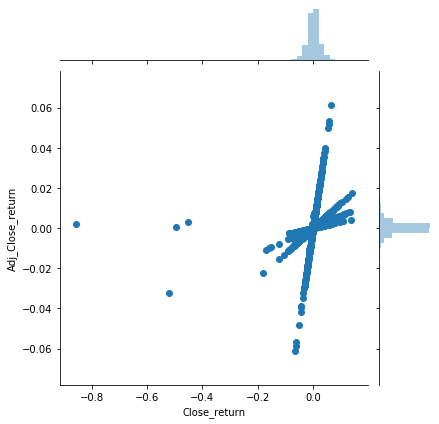

In [7]:
import seaborn as sns
sns.jointplot(x="Close_return", y="Adj_Close_return", data=AAPL);

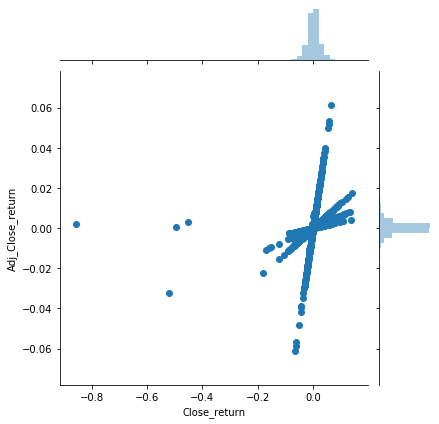

In [8]:
sns.jointplot(x="Close_return", y="Adj_Close_return", data=AAPL);

In [9]:
AAPL.std()/AAPL.mean()

Adj_Close            1.077296
Close                1.017801
Div                 15.515318
Factor               0.094075
High                 1.014879
Low                  1.020944
Open                 1.018036
Volume               0.767192
Close_return        44.101261
Adj_Close_return    31.540083
dtype: float64

In [10]:
AAPL.mean()

Adj_Close           3.406585e+01
Close               1.704504e+02
Div                 1.998737e-03
Factor              1.001870e+00
High                1.724240e+02
Low                 1.684076e+02
Open                1.705287e+02
Volume              1.299660e+08
Close_return        7.137138e-04
Adj_Close_return    1.893071e-04
dtype: float64

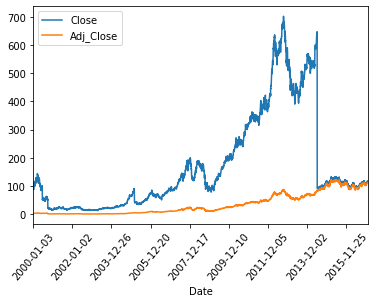

In [11]:
AAPL[['Close','Adj_Close']].plot(rot = 50)

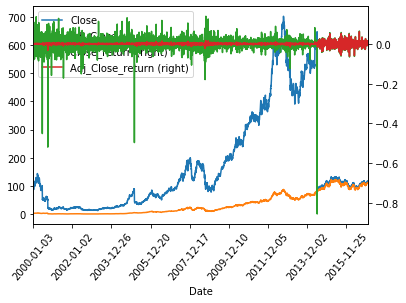

In [12]:
AAPL[['Close','Adj_Close','Close_return','Adj_Close_return']].plot(secondary_y = ['Close_return','Adj_Close_return'],rot = 50)

- Based on the descripetion, we can see that adjusted close return features lower volitality than Close return, while the two have strong positive correlation.

- In addition, adjusted return is generated by adjusted close price. Adjusted close is the closing price after adjustments for all applicable splits and dividend distributions. Data is adjusted using appropriate split and dividend multipliers, adhering to Center for Research in Security Prices (CRSP) standards.

So adjusted return is more predictable, consistent and useful for investors with less noise.

## 1.3 Define the performance measure

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

The three  performance measure：

Explained Variance Score：
- The explained_variance_score computes the explained variance regression score.
- The best possible score is 1.0, lower values are worse.

R2：
- It represents the proportion of variance (of y) that has been explained by the independent variables in the model. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance.
- As such variance is dataset dependent, R² may not be meaningfully comparable across different datasets. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R² score of 0.0.

Max Error：
- The max_error function computes the maximum residual error , a metric that captures the worst case error between the predicted value and the true value. In a perfectly fitted single output regression model, max_error would be 0 on the training set and though this would be highly unlikely in the real world, this metric shows the extent of error that the model had when it was fitted.


I mainly select EVS and R2, as these two methods are relative number without being affected by absolute small value.
I don't use MSE, since the error would become too small after squre calculation. ME serving as a substitute would capture the worst situation rather than the average one. 


In [13]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.metrics import max_error
def performance(y_true,y_pred):
    evs = explained_variance_score(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    max_e = max_error(y_true, y_pred)
    return evs,r2,max_e

## 1.4 Create test set

In order to avoid the look-ahead bias and overfitting, I will use lag data(t-1) to predict stock return at time t.

In [14]:
from  sklearn import model_selection
train_x, TEST_X, train_y, TEST_Y = model_selection.train_test_split(AAPL.loc[:,'Adj_Close':'Volume'],AAPL.loc[:,'Adj_Close_return'],test_size=0.2, random_state=0, shuffle = False)
train_AAPL = train_x.join(train_y)
train_AAPL.head()

,Adj_Close,Close,Div,Factor,High,Low,Open,Volume,Adj_Close_return
Date,,,,,,,,,
2000-01-03,3.4785,111.938,0.0,1.0,112.500,101.688,104.8750,133949200.0,NaN
2000-01-04,3.1852,102.500,0.0,1.0,110.625,101.188,108.2500,128094400.0,-0.002620
2000-01-05,3.2318,104.000,0.0,1.0,110.563,103.000,103.7500,194580400.0,0.000455
2000-01-06,2.9521,95.000,0.0,1.0,107.000,95.000,106.1183,191993200.0,-0.002689
2000-01-07,3.0920,99.500,0.0,1.0,101.000,95.500,96.5000,115183600.0,0.001473


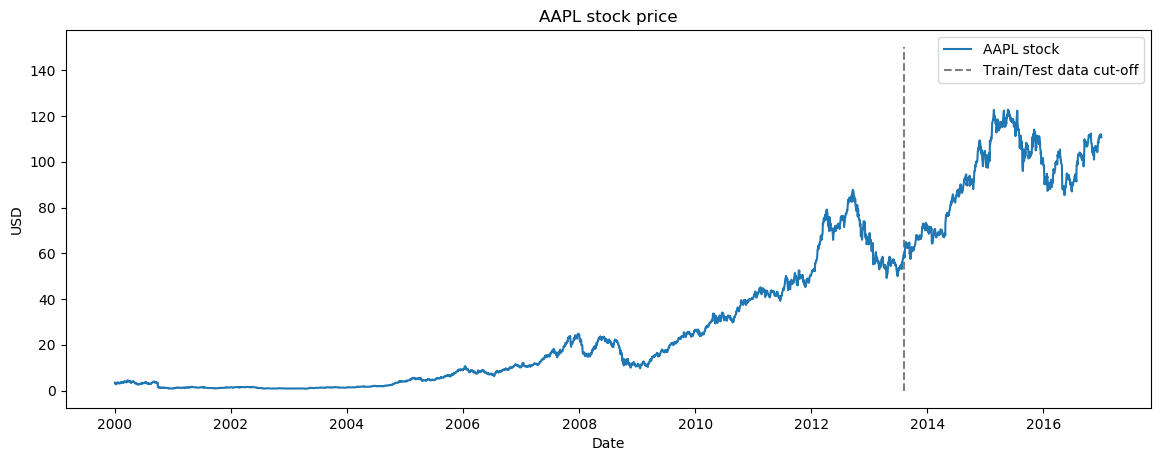

In [15]:
plt.figure(figsize=(14, 5), dpi=100)
plt.plot(dataset_ex_df['Dt'], dataset_ex_df['Adj Close'], label='AAPL stock')
plt.vlines(datetime.date(2013,8, 9), 0, 150, linestyles='--', colors='gray', label='Train/Test data cut-off')
plt.xlabel('Date')
plt.ylabel('USD')
plt.title('AAPL stock price')
plt.legend()
plt.show()

In [16]:
Ltrain_x_AAPL = train_x.shift(1)
Ltrain_x_AAPL.columns = Ltrain_x_AAPL.columns.map(lambda x:str('Lag1_'+x))
Ltrain_x_AAPL.head()

,Lag1_Adj_Close,Lag1_Close,Lag1_Div,Lag1_Factor,Lag1_High,Lag1_Low,Lag1_Open,Lag1_Volume
Date,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,3.4785,111.938,0.0,1.0,112.500,101.688,104.8750,133949200.0
2000-01-05,3.1852,102.500,0.0,1.0,110.625,101.188,108.2500,128094400.0
2000-01-06,3.2318,104.000,0.0,1.0,110.563,103.000,103.7500,194580400.0
2000-01-07,2.9521,95.000,0.0,1.0,107.000,95.000,106.1183,191993200.0


In [17]:
Ltrain_AAPL = Ltrain_x_AAPL.join(train_y)
Ltrain_AAPL = Ltrain_AAPL.dropna()
Ltrain_AAPL.head()

,Lag1_Adj_Close,Lag1_Close,Lag1_Div,Lag1_Factor,Lag1_High,Lag1_Low,Lag1_Open,Lag1_Volume,Adj_Close_return
Date,,,,,,,,,
2000-01-04,3.4785,111.938,0.0,1.0,112.500,101.688,104.8750,133949200.0,-0.002620
2000-01-05,3.1852,102.500,0.0,1.0,110.625,101.188,108.2500,128094400.0,0.000455
2000-01-06,3.2318,104.000,0.0,1.0,110.563,103.000,103.7500,194580400.0,-0.002689
2000-01-07,2.9521,95.000,0.0,1.0,107.000,95.000,106.1183,191993200.0,0.001473
2000-01-10,3.0920,99.500,0.0,1.0,101.000,95.500,96.5000,115183600.0,-0.000547


In [18]:
num_training_days = int(Ltrain_AAPL.shape[0])
print('Number of training days: {}. Number of test days: {}.'.format(num_training_days, \
                                                                    AAPL.shape[0]-num_training_days))

Number of training days: 3420. Number of test days: 857.


Training Data：
- Ltrain_AAPL: lag independent variable with dependent variable
- Ltrain_x_AAPL: lag independent variable
- train_y: dependent variable

Test Data:
- TEST_X
- TEST_Y

# 2.Explorarory Data Analysis

## 2.1 Return and Volume

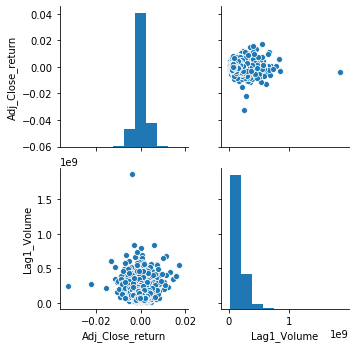

In [19]:
import seaborn as sns
sns.pairplot(Ltrain_AAPL[['Adj_Close_return','Lag1_Volume']])

- No obvious linear relation shows up between Adj_Close_Return and Lag1_Volumn.
- The Adj_Close_Return roughly yields to normal distribution.
- However, the Lag Volumn features a right skewed. This might be caused by dramatic increasing volumn in both start of boom and bust period.


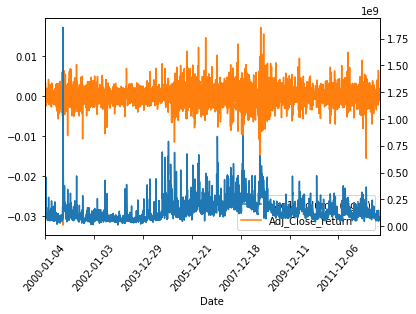

In [20]:
Ltrain_AAPL[['Lag1_Volume','Adj_Close_return']].plot(secondary_y = ['Lag1_Volume'],rot = 50)

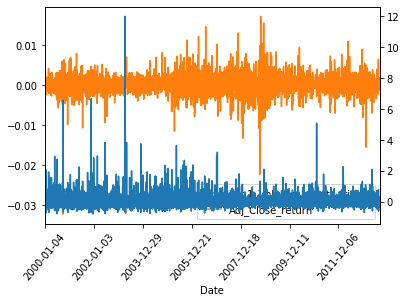

In [21]:
Ltrain_AAPL['Lag1_Volume_growth'] = ((train_AAPL.Volume - train_AAPL.Volume.shift(1))/train_AAPL.Volume.shift(1)).shift(1)
Ltrain_AAPL[['Lag1_Volume_growth','Adj_Close_return']].plot(secondary_y = ['Lag1_Volume_growth'],rot = 50)

- 1.non-linear relation
- 2.level volumn and growth volumn has reverse relation with return from 2005 to 2008, 
  which shows the gradually weakening momentumn before financial crisis
- 3.rolling standard deviation of volumn

## 2.2 Return and Price  

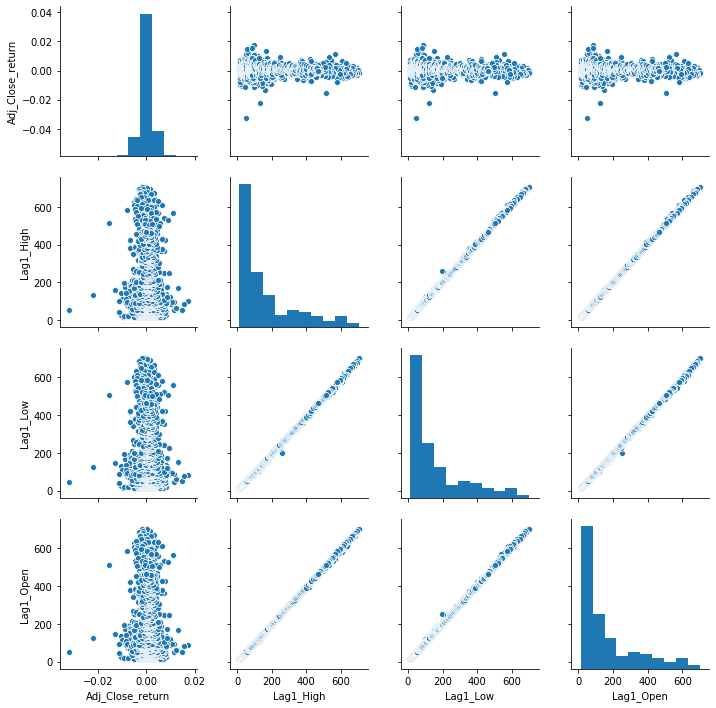

In [22]:
sns.pairplot(Ltrain_AAPL[['Adj_Close_return','Lag1_High','Lag1_Low','Lag1_Open']])

- non-linear relation

## 2.3 DIV

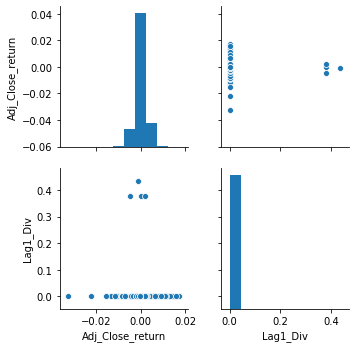

In [23]:
sns.pairplot(Ltrain_AAPL[['Adj_Close_return','Lag1_Div']])

## 2.4 Return and Return(-1)

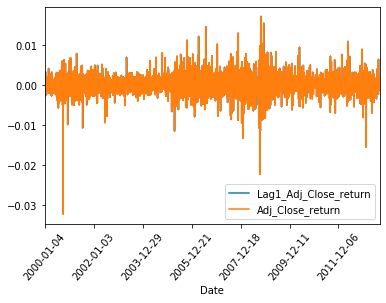

In [24]:
Ltrain_AAPL['Lag1_Adj_Close_return'] = Ltrain_AAPL['Adj_Close_return'].shift(1)
Ltrain_AAPL[['Lag1_Adj_Close_return','Adj_Close_return']].plot(rot = 50)

In [25]:
Ltrain_AAPL.head()

,Lag1_Adj_Close,Lag1_Close,Lag1_Div,Lag1_Factor,Lag1_High,Lag1_Low,Lag1_Open,Lag1_Volume,Adj_Close_return,Lag1_Volume_growth,Lag1_Adj_Close_return
Date,,,,,,,,,,,
2000-01-04,3.4785,111.938,0.0,1.0,112.500,101.688,104.8750,133949200.0,-0.002620,NaN,NaN
2000-01-05,3.1852,102.500,0.0,1.0,110.625,101.188,108.2500,128094400.0,0.000455,-0.043709,-0.002620
2000-01-06,3.2318,104.000,0.0,1.0,110.563,103.000,103.7500,194580400.0,-0.002689,0.519039,0.000455
2000-01-07,2.9521,95.000,0.0,1.0,107.000,95.000,106.1183,191993200.0,0.001473,-0.013296,-0.002689
2000-01-10,3.0920,99.500,0.0,1.0,101.000,95.500,96.5000,115183600.0,-0.000547,-0.400064,0.001473


In [26]:
order = ['Adj_Close_return','Lag1_Adj_Close', 'Lag1_Close', 'Lag1_Div', 'Lag1_Factor', 'Lag1_High',
       'Lag1_Low', 'Lag1_Open', 'Lag1_Volume', 'Lag1_Volume_growth', 
       'Lag1_Adj_Close_return']
Ltrain_AAPL = Ltrain_AAPL[order]
Ltrain_AAPL = Ltrain_AAPL.dropna()
Ltrain_AAPL.head()

,Adj_Close_return,Lag1_Adj_Close,Lag1_Close,Lag1_Div,Lag1_Factor,Lag1_High,Lag1_Low,Lag1_Open,Lag1_Volume,Lag1_Volume_growth,Lag1_Adj_Close_return
Date,,,,,,,,,,,
2000-01-05,0.000455,3.1852,102.50,0.0,1.0,110.625,101.188,108.2500,128094400.0,-0.043709,-0.002620
2000-01-06,-0.002689,3.2318,104.00,0.0,1.0,110.563,103.000,103.7500,194580400.0,0.519039,0.000455
2000-01-07,0.001473,2.9521,95.00,0.0,1.0,107.000,95.000,106.1183,191993200.0,-0.013296,-0.002689
2000-01-10,-0.000547,3.0920,99.50,0.0,1.0,101.000,95.500,96.5000,115183600.0,-0.400064,0.001473
2000-01-11,-0.001590,3.0376,97.75,0.0,1.0,102.250,94.750,102.0000,126266000.0,0.096215,-0.000547


## 2.5 All variable analyse

We can find that Adj_Close_return have little correlation with other variables, 
suggesting that linear relation is less likely to exist.
This requires us to explore more non-linear relations between return and other independent variables.

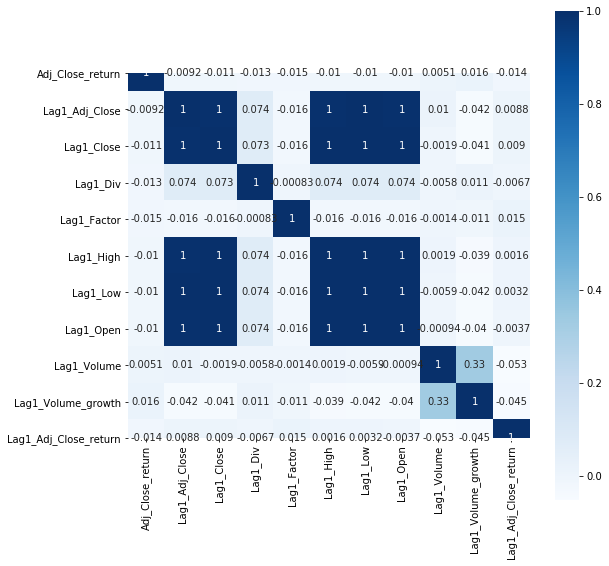

In [27]:
import matplotlib.pyplot as plt
def test(df):
    dfData = df.corr()
    plt.subplots(figsize=(9, 9)) 
    sns.heatmap(dfData, annot=True, vmax=1, square=True, cmap="Blues")
    plt.savefig('./AAPL_relation.png')
    plt.show()
test(Ltrain_AAPL)

In [30]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(Ltrain_AAPL)
profile.to_file('Basic_variable_report.html')
profile

# 3.Prepare the data

## 3.1 Data cleaning and description¶

- Since there is no missing data or data requiring encoding, I decide keep all the data and information. 
- Because of the low correlation,it is less possible to have overfitting problem.
- In addition, the outliers represent the market boom or bust, which is very valuable sample showing up every five or ten years.

## 3.2 ARIMA Test
- I want to try ARIMA model first and test the autocorrelation of return data, and I find that no autocorrelation exists.

In [31]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
from pandas import datetime

series = Ltrain_AAPL['Lag1_Adj_Close_return'].dropna()
model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                                ARIMA Model Results                                
Dep. Variable:     D.Lag1_Adj_Close_return   No. Observations:                 3418
Model:                      ARIMA(5, 1, 0)   Log Likelihood               15200.121
Method:                            css-mle   S.D. of innovations              0.003
Date:                     Sun, 08 Dec 2019   AIC                         -30386.242
Time:                             12:14:12   BIC                         -30343.284
Sample:                                  1   HQIC                        -30370.893
                                                                                   
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          4.333e-07   1.35e-05      0.032      0.974   -2.61e-05    2.69e-05
ar.L1.D.Lag1_Adj_Close_return    -

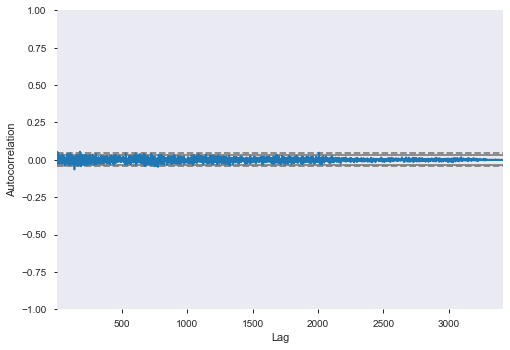

<Figure size 800x560 with 0 Axes>

In [32]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
plt.figure(figsize=(10, 7), dpi=80)
plt.show() 

## 3.3 Feature Engineering
- In this part, I want to create some new varibles based on analysis of last section, like volumn growth.
- Also, some other technical indicators, like MA, MACD, etc.
- Attention: All of this require lag data to avoid look-ahead bias.

In [33]:
Ltrain_AAPL.head()

,Adj_Close_return,Lag1_Adj_Close,Lag1_Close,Lag1_Div,Lag1_Factor,Lag1_High,Lag1_Low,Lag1_Open,Lag1_Volume,Lag1_Volume_growth,Lag1_Adj_Close_return
Date,,,,,,,,,,,
2000-01-05,0.000455,3.1852,102.50,0.0,1.0,110.625,101.188,108.2500,128094400.0,-0.043709,-0.002620
2000-01-06,-0.002689,3.2318,104.00,0.0,1.0,110.563,103.000,103.7500,194580400.0,0.519039,0.000455
2000-01-07,0.001473,2.9521,95.00,0.0,1.0,107.000,95.000,106.1183,191993200.0,-0.013296,-0.002689
2000-01-10,-0.000547,3.0920,99.50,0.0,1.0,101.000,95.500,96.5000,115183600.0,-0.400064,0.001473
2000-01-11,-0.001590,3.0376,97.75,0.0,1.0,102.250,94.750,102.0000,126266000.0,0.096215,-0.000547


### 3.3.1 Calculate technical indicators
- Moving average
- MACD
- Bolling Bands
- EMV
- Momentum

In [34]:
def get_technical_indicators(dataset):
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['Lag1_Adj_Close'].rolling(window=7).mean()
    dataset['ma21'] = dataset['Lag1_Adj_Close'].rolling(window=21).mean()
    
    # Create MACD
    dataset['26ema'] = dataset['Lag1_Adj_Close'].ewm(span=26).mean()
    dataset['12ema'] = dataset['Lag1_Adj_Close'].ewm(span=12).mean()
    dataset['MACD'] = (dataset['12ema']-dataset['26ema'])

    # Create Bollinger Bands
    dataset['20sd'] = dataset['Lag1_Adj_Close'].rolling(20).std()
    dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
    dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)
    
    # Create Exponential moving average
    dataset['ema'] = dataset['Lag1_Adj_Close'].ewm(com=0.5).mean()
    
    # Create Momentum
    dataset['momentum'] = dataset['Lag1_Adj_Close']-1
    
    return dataset

In [35]:
dataset_TI_df = get_technical_indicators(Ltrain_AAPL)
dataset_TI_df.head()

,Adj_Close_return,Lag1_Adj_Close,Lag1_Close,Lag1_Div,Lag1_Factor,Lag1_High,Lag1_Low,Lag1_Open,Lag1_Volume,Lag1_Volume_growth,...,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-05,0.000455,3.1852,102.50,0.0,1.0,110.625,101.188,108.2500,128094400.0,-0.043709,...,NaN,NaN,3.185200,3.185200,0.000000,NaN,NaN,NaN,3.185200,2.1852
2000-01-06,-0.002689,3.2318,104.00,0.0,1.0,110.563,103.000,103.7500,194580400.0,0.519039,...,NaN,NaN,3.209396,3.210442,0.001046,NaN,NaN,NaN,3.220150,2.2318
2000-01-07,0.001473,2.9521,95.00,0.0,1.0,107.000,95.000,106.1183,191993200.0,-0.013296,...,NaN,NaN,3.116952,3.109611,-0.007341,NaN,NaN,NaN,3.034577,1.9521
2000-01-10,-0.000547,3.0920,99.50,0.0,1.0,101.000,95.500,96.5000,115183600.0,-0.400064,...,NaN,NaN,3.109977,3.104052,-0.005925,NaN,NaN,NaN,3.073338,2.0920
2000-01-11,-0.001590,3.0376,97.75,0.0,1.0,102.250,94.750,102.0000,126266000.0,0.096215,...,NaN,NaN,3.093192,3.085997,-0.007195,NaN,NaN,NaN,3.049414,2.0376


In [36]:
dataset_TI_df['log_momentum'] = np.log(dataset_TI_df['momentum'])


In [37]:
def plot_technical_indicators(dataset, last_days):

    plt.figure(figsize=(26, 20), dpi=100)
    shape_0 = dataset.shape[0]
    xmacd_ = shape_0-last_days
    
    dataset = dataset.iloc[-last_days:, :]
    x_ = range(3, dataset.shape[0])
    x_ =list(dataset.index)
    
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    #ax1.set_xlabel('')
    #ax1.set_ylabel('exp', color=color)
    #ax1.plot(dataset_TI_df.index, dataset_TI_df[], color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.plot(dataset['ma7'],label='MA 7', color='g',linestyle='--')
    #ax1.plot(dataset['Lag1_Adj_Close'],label='Lag1_Adj_Close', color='b')
    ax1.plot(dataset['ma21'],label='MA 21', color='r',linestyle='--')
    ax1.plot(dataset['upper_band'],label='Upper Band', color='c')
    ax1.plot(dataset['lower_band'],label='Lower Band', color='c')
    ax1.fill_between(x_, dataset['lower_band'], dataset['upper_band'], alpha=0.35)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
    ax2.plot(dataset['Lag1_Adj_Close_return'], color=color,label = 'Lag1_Adj_Close')

    ax2.tick_params(axis='y', labelcolor=color)

    plt.xticks(np.arange(1,400+1, 90.0))
    plt.title('Technical indicators for AAPL - last {} days.'.format(last_days))
    plt.ylabel('Return')
    plt.legend()

<Figure size 2600x2000 with 0 Axes>

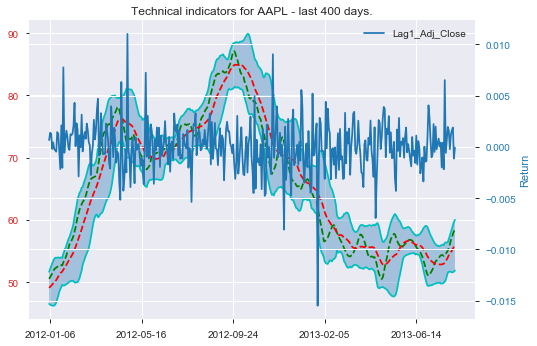

In [38]:
plot_technical_indicators(dataset_TI_df, 400)

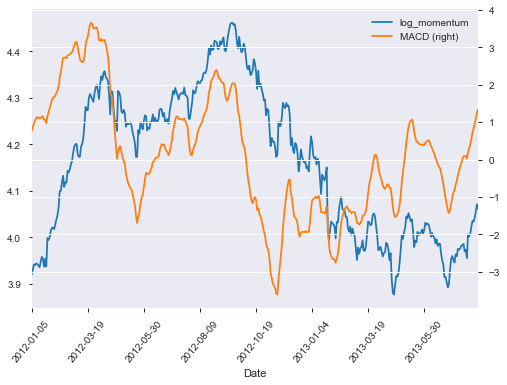

In [39]:
Ltrain_AAPL.ix[-400:-1,['log_momentum','MACD']].plot(secondary_y = ['MACD'],rot = 50)

- dataset_TI_df: feature engineering with price



Among all the indexes listed as follows, the most related one should be XLK(technology),
since AAPL is basically a technology firm. Therefore, we use XLK as another index
to predict the return of AAPL. Based on the idea od pair trading, the lag difference would be used to predict the AAPL return.

- XLC=Communication Services
- XLY=Consumer Discretionary
- XLP=Consumer Staples
- XLE=Energy
- XLF=Financials
- XLV=Health Care
- XLI=Industrials
- XLB=Materials
- XLRE=Real Estate
- XLK=Technology
- XLU=Utilities

Source:SPDR ETFs
https://www.sectorspdr.com/sectorspdr/sectors

### 3.3.2 Get feature importance

In [40]:
def lag_transform(X,y):
    #Ltrain_x_AAPL['Adj_Close_return'] = 
    Ltrain_x_AAPL = X.shift(1)    
    Ltrain_x_AAPL.columns = Ltrain_x_AAPL.columns.map(lambda x:str('Lag1_'+x))
    Ltrain_x_AAPL['Lag1_Volume_growth'] = ((X.Volume - X.Volume.shift(1))/X.Volume.shift(1)).shift(1)
    Ltrain_xy_AAPL = Ltrain_x_AAPL.join(y)
    Ltrain_xy_AAPL = Ltrain_xy_AAPL.dropna()
    
    return Ltrain_xy_AAPL

In [41]:
def columns_transfer(dataset_TI_df_return):
    order = ['Adj_Close_return','Lag1_Adj_Close', 'Lag1_Close', 'Lag1_Div', 'Lag1_Factor', 'Lag1_High',
       'Lag1_Low', 'Lag1_Open', 'Lag1_Volume','Lag1_Volume_growth','Lag1_Adj_Close_return', 'ma7', 'ma21', '26ema', '12ema', 'MACD',
       '20sd', 'upper_band', 'lower_band', 'ema', 'momentum']
    TrainYX_returnIT = dataset_TI_df_return[order]
    TrainYX_returnIT = TrainYX_returnIT.dropna()
    TrainX_retIT = TrainYX_returnIT.loc[:,'Lag1_Adj_Close':'momentum']
    TrainY_retIT = TrainYX_returnIT.loc[:,'Adj_Close_return']
    return TrainX_retIT,TrainY_retIT

[12:14:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0.05508507 0.06075897 0.         0.         0.07336809 0.06316198
 0.04971574 0.05570582 0.08619706 0.05591554 0.19402036 0.02700633
 0.02165942 0.         0.07016342 0.06388526 0.01916991 0.03476673
 0.06942025 0.        ]


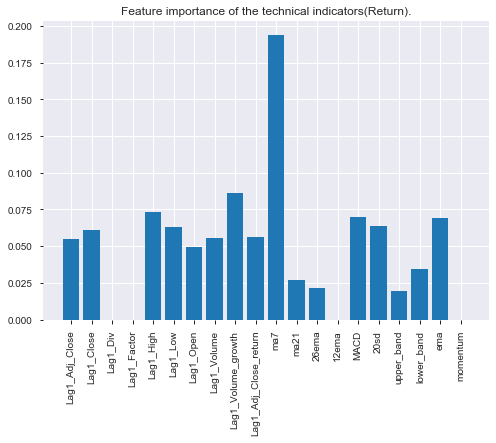

In [42]:
import xgboost as xgb
def feature_importance(X,y):
    xgbModel = xgb.XGBRegressor()
    xgbModel.fit(X,y)
    # feature importance
    print(xgbModel.feature_importances_)
    # plot
    plt.xticks(rotation='vertical')
    plt.bar([i for i in range(len(xgbModel.feature_importances_))], xgbModel.feature_importances_.tolist(), tick_label=X.columns)
    plt.title('Feature importance of the technical indicators(Return).')
    plt.show()
    
TrainX_priceIT,TrainY_priceIT = columns_transfer(dataset_TI_df)
feature_importance(TrainX_priceIT, TrainY_priceIT)

Based on the result of feature importance, when we can find that most of the features could take effect and we can almost make full use of every feature.

## 3.4 Scaling

In [43]:
from sklearn.preprocessing import MinMaxScaler

TrainX = TrainX_priceIT.values
TrainY = pd.DataFrame(TrainY_priceIT).values

Train_xy = np.hstack((TrainX, TrainY))
scaler_train = MinMaxScaler(feature_range=(0, 1))
Train_xy = scaler_train.fit_transform(Train_xy)


In [44]:
# transfer test dataset

def x_transfer(X,y):
    Lxy_AAPL = lag_transform(X,y)
    LtestX_price_AAPL,Ltesty_price_AAPL = columns_transfer(get_technical_indicators(Lxy_AAPL))
    #LtestX_return_AAPL,Ltesty_return_AAPL = columns_transfer(get_technical_indicators_return(Lxy_AAPL))
  
    return LtestX_price_AAPL,Ltesty_price_AAPL


TEST_X = TEST_X.join(TEST_Y.shift(1))
LtestX_price_AAPL,Ltesty_price_AAPL = x_transfer(TEST_X,TEST_Y)
Test_xy = LtestX_price_AAPL.join(Ltesty_price_AAPL).values

scaler_test = MinMaxScaler(feature_range=(0, 1))
Test_xy = scaler_test.fit_transform(Test_xy)
#Test_X,Test_y = split_sequences(Test_xy, n_steps)

- Train dataset:TrainX_priceIT, TrainY_priceIT
- Scaled Train dataset: Train_xy

- Test dataset:LtestX_price_AAPL,Ltesty_price_AAPL,Test_xy
- Scaled Train dataset:Test_xy

# 4.Classic Machine Learning Model Training

- select a model

    - Decision Tree Regressor 
    - SVM Regressor 
    - K Neighbors Regressor 
    - Random Forest Regressor 
    - Adaboost Regressor 
    - Gradient Boosting Random Forest Regressor 
    - bagging Regressor 
    - ExtraTree Regressor 

- fit a model
- cross validation


## 4.1 Original Data¶
- Since time series are sensitive to sequence, so I avoid using cross validation, but rather choose to apply a rolling window.
- The standard to judge whether a model is good or not depends on the mean of all the results generated by the rolling window.

In [45]:
import os.path
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import ensemble
from sklearn.ensemble import BaggingRegressor,AdaBoostRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error,max_error,r2_score,explained_variance_score



def rolling_test(model,name,X,y,Evs = [], R2 = [],Max_error = []):
    
    for i in range(0,len(X)-252*5+1,252):
        start_year = 2000+int(i/252)
        end_year = start_year+5
        train_x = X[i:i+5*252]
        train_y = y[i:i+5*252]
        test_y = y[i+5*252:i+5*252+200]
        test_x = X[i+5*252:i+5*252+200]
        y_pred = model.fit(train_x,train_y).predict(test_x)
        evs = explained_variance_score(test_y, y_pred)
        r2 = r2_score(test_y, y_pred)
        max_e = max_error(test_y, y_pred)
        Evs.append(evs)
        R2.append(r2)
        Max_error.append(max_e)
        
        
    print(name)
    print("r2_mean_score=",'%.4f' %  np.mean(R2))
    print("Max_error_mean_score=",'%.4f' %  np.mean(Max_error))
    print("Evs_mean_score=",'%.4f' %  np.mean(Evs))

    return y_pred,test_y

In [46]:
models=[KNeighborsRegressor(),DecisionTreeRegressor(),RandomForestRegressor(),
        GradientBoostingRegressor(),SVR(),BaggingRegressor(),AdaBoostRegressor(),ExtraTreeRegressor()]

names=['KNN','Decision Tree','RF','GDBT','SVM','BG','ADBoost','ExtraTree']

X = TrainX_priceIT
y = TrainY_priceIT

for name, model in zip(names,models):
    rolling_test(model,name,X,y)

KNN
r2_mean_score= -0.2251
Max_error_mean_score= 0.0122
Evs_mean_score= -0.2177
Decision Tree
r2_mean_score= -1.6578
Max_error_mean_score= 0.0155
Evs_mean_score= -0.8778
RF
r2_mean_score= -1.3285
Max_error_mean_score= 0.0146
Evs_mean_score= -0.6837
GDBT
r2_mean_score= -1.3171
Max_error_mean_score= 0.0144
Evs_mean_score= -0.5989
SVM
r2_mean_score= -1.6008
Max_error_mean_score= 0.0144
Evs_mean_score= -0.4791
BG
r2_mean_score= -1.4548
Max_error_mean_score= 0.0143
Evs_mean_score= -0.4641
ADBoost
r2_mean_score= -1.2979
Max_error_mean_score= 0.0144
Evs_mean_score= -0.4338
ExtraTree
r2_mean_score= -1.5969
Max_error_mean_score= 0.0148
Evs_mean_score= -0.7102


Since all of the R2 are less than zero, so every chosen model does not follow the trend of the data, so fits worse than a horizontal line. Among all, Select ADBoost performs relatively better. So I will visualize the result of Adaboost prediction.

In [47]:
y_pred,test_y = rolling_test(AdaBoostRegressor(),'ADBoost',X,y)

ADBoost
r2_mean_score= -1.4455
Max_error_mean_score= 0.0147
Evs_mean_score= -0.6472


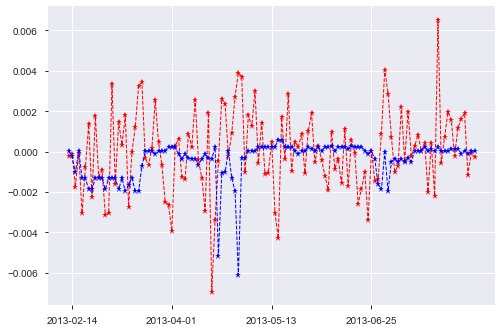

In [49]:
plt.plot(test_y, color="r", linestyle="--", marker="*", linewidth=1.0, label = 'y_real')
plt.plot(y_pred, color="b", linestyle="--", marker="*", linewidth=1.0, label = 'y_predict')
plt.xticks(np.arange(1,100+1, 30.0))
plt.show()

Obviously, the result is expectedly bad.

### 4.2 Scaling Data

In [50]:

X = Train_xy[:,:-1]
y = Train_xy[:,-1]

for name, model in zip(names,models):
    rolling_test(model,name,X,y)

KNN
r2_mean_score= -1.3322
Max_error_mean_score= 0.0374
Evs_mean_score= -0.5977
Decision Tree
r2_mean_score= -1.4924
Max_error_mean_score= 0.0677
Evs_mean_score= -0.6767
RF
r2_mean_score= -1.4329
Max_error_mean_score= 0.0848
Evs_mean_score= -0.6497
GDBT
r2_mean_score= -1.4202
Max_error_mean_score= 0.1003
Evs_mean_score= -0.6257
SVM
r2_mean_score= -1.3304
Max_error_mean_score= 0.1097
Evs_mean_score= -0.5834
BG
r2_mean_score= -1.2904
Max_error_mean_score= 0.1191
Evs_mean_score= -0.5639
ADBoost
r2_mean_score= -1.2224
Max_error_mean_score= 0.1283
Evs_mean_score= -0.5367
ExtraTree
r2_mean_score= -1.3963
Max_error_mean_score= 0.1422
Evs_mean_score= -0.6416


The result is a bit better, but still it seems that the models do not follow the trend of the data

In [51]:
y_pred,test_y = rolling_test(AdaBoostRegressor(),'ADBoost',X,y)

ADBoost
r2_mean_score= -1.3310
Max_error_mean_score= 0.1492
Evs_mean_score= -0.6143


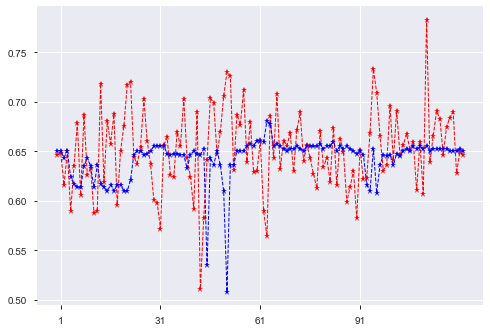

In [52]:
plt.plot(test_y, color="r", linestyle="--", marker="*", linewidth=1.0)
plt.plot(y_pred, color="b", linestyle="--", marker="*", linewidth=1.0)
plt.xticks(np.arange(1,100+1, 30.0))
plt.show()

It shows that the y prediction is more volatile after scaling.

# 5. Error Analysis

## 5.1 LSTM with all features

In [53]:
# IMPORTING IMPORTANT LIBRARIES

import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM

Using TensorFlow backend.


In [54]:
# PREPARATION OF TIME SERIES DATASE

In [55]:
np.random.seed(7)
# multivariate lstm
#https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [56]:
# choose a number of time steps
step_size = 1
n_steps = 1
# convert into input/output
trainX, trainY = split_sequences(Train_xy, n_steps)
Test_X,Test_y = split_sequences(Test_xy, n_steps)
# the dataset knows the number of features, e.g. 2
n_features = trainX.shape[2]
# define model


In [57]:
model = Sequential()
model.add(LSTM(32, input_shape=(step_size,n_features), return_sequences = True))
model.add(LSTM(16))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(trainX, trainY, epochs=200, verbose=0)

In [58]:
# PREDICTION
trainPredict = model.predict(trainX)
testPredict = model.predict(Test_X)

In [59]:
trainPredict_org = scaler_train.inverse_transform(hstack((Train_xy[:,:-1], trainPredict)))
trainY_original = trainPredict_org[:,-1]
testPredict_org = scaler_test.inverse_transform(hstack((Test_xy[:,:-1], testPredict)))
testY_original = testPredict_org[:,-1]

In [60]:
def draw(y_pred,y_true):
    obs = np.arange(1, len(y_pred) + 1, 1)
    plt.plot(obs,y_pred, 'g', label = 'prediction dataset')
    plt.plot(obs,y_true, 'r', label = 'original dataset')
    plt.legend(loc = 'upper right')
    plt.xlabel('Time in Days')
    plt.ylabel('Return of Apple Stocks')
    plt.show()


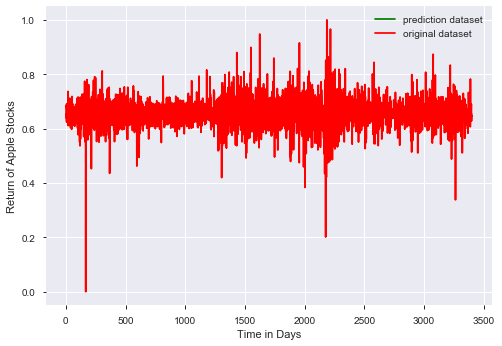

In [61]:
draw(trainPredict,Train_xy[:,-1])

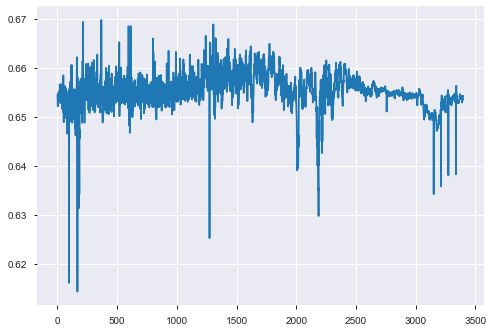

In [62]:
plt.plot(trainPredict)

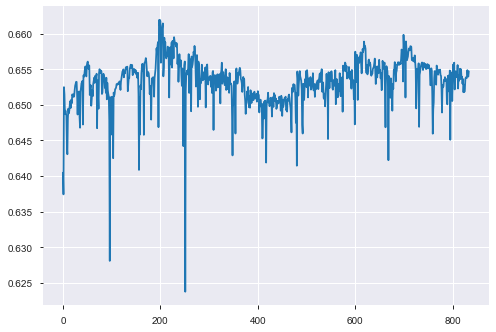

In [63]:
plt.plot(testPredict)

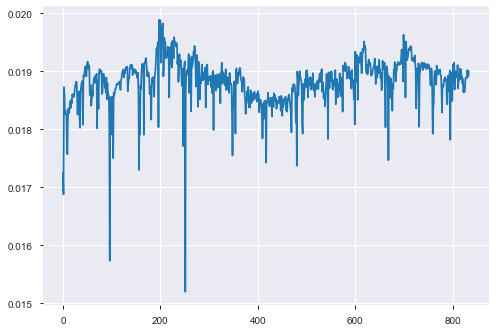

In [64]:
plt.plot(testY_original)

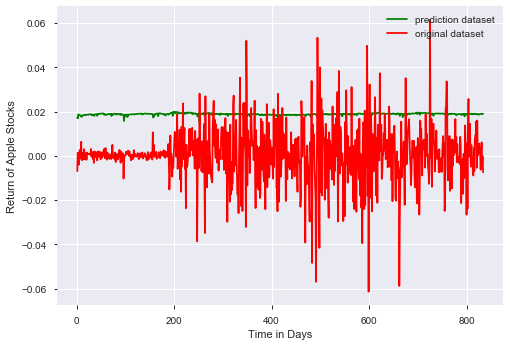

In [65]:
draw(testY_original,Ltesty_price_AAPL)

We could find that overfitting problem shows up after comparing the prediction of test data and training dataset, as I give too many inputs to the model.

- test dataset performance

- r2,max_error, evs

In [66]:
test_evs,test_r2,test_max_error = performance(Ltesty_price_AAPL,testY_original)
print('test_evs:',test_evs)
print('test_r2:',test_r2)
print('test_max_error:',test_max_error)

test_evs: 0.0003507256869347275
test_r2: -2.19848414528163
test_max_error: 0.08021021238124133


In order to solve the overfiting problem, first I will try just use the lag return, original variables and technical index to predict return.
- lag return: different lag periods
- technical indexes: Moving average,MACD,Bolling Bands,EMV,Momentum

## 5.2 lag return

### 5.2.1 Prediction with one model

In [67]:
Train_return_xy = pd.DataFrame(TrainX_priceIT.Lag1_Adj_Close_return).join(TrainY_priceIT).values
scaler_return_train = MinMaxScaler(feature_range=(0, 1))
Train_return_xy = scaler_return_train.fit_transform(Train_return_xy)
Test_return_xy = pd.DataFrame(LtestX_price_AAPL.Lag1_Adj_Close_return).join(Ltesty_price_AAPL).values
scaler_return_test = MinMaxScaler(feature_range=(0, 1))
Test_return_xy = scaler_return_test.fit_transform(Test_return_xy)

In [68]:
Train_return_x_1,Train_return_y_1 = split_sequences(Train_return_xy, 1)

Test_return_x_1,Test_return_y_1 = split_sequences(Test_return_xy, 1)


In [69]:
def LSTM_model(trainX,trainY,Train_xy,Test_X,Test_xy,step_size):

    # the dataset knows the number of features, e.g. 2
    n_features = trainX.shape[2]
    # define model
    model = Sequential()
    model.add(LSTM(32, input_shape=(step_size,n_features), return_sequences = True))
    model.add(LSTM(16))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    # fit model
    model.fit(trainX, trainY, epochs=200, verbose=0)

    # PREDICTION
    #trainPredict = model.predict(trainX)
    testPredict = model.predict(Test_X)

    #testPredict_org = scaler_test.inverse_transform(hstack((Test_xy[:,:-1], testPredict)))
    #testY_original = testPredict_org[:,-1]
    y_test = Test_xy[:,-1]
    #testPredict
    
    test_evs,test_r2,test_max_error = performance(y_test,testPredict)
    #test_evs,test_r2,test_max_error = performance(y_test_real,testY_original)
    print('test_evs:',test_evs)
    print('test_r2:',test_r2)
    print('test_max_error:',test_max_error)
    return testPredict,y_test

In [70]:
testPredict,y_test = LSTM_model(Train_return_x_1,Train_return_y_1,Train_return_xy,
                Test_return_x_1,Test_return_xy,1)

test_evs: 0.00022194037886635876
test_r2: -2.224163638184968
test_max_error: 0.6550825238227844


Given that the result of LSTM features a low R2, we try to use a rolling window instead of calculating all the results with one LSTM.
So in this case, the training dataset and test dataset are rolling in every loop. It means:
    - Training set: t:t+win
    - Test set: t+win+1
    - t is changing every time

### 5.2.2 Upgrade model every day with a rolling window method

In [71]:
AAPL['L1_Adj_Close_return'] = AAPL['Adj_Close_return'].shift(1)
Return_XY = AAPL.loc[:,'Adj_Close_return':'L1_Adj_Close_return'].values
return_x_1,return_y_1 = split_sequences(Return_XY, 1)


In [72]:
 def LSTM_rolling(trainX,trainY,Test_X):   
    # the dataset knows the number of features, e.g. 2
    n_features = trainX.shape[2]
    # define model
    model = Sequential()
    model.add(LSTM(32, input_shape=(step_size,n_features), return_sequences = True))
    model.add(LSTM(16))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    # fit model
    model.fit(trainX, trainY, epochs=200, verbose=0)
    # PREDICTION
    testPredict = model.predict(Test_X)

    return testPredict


In [73]:
import time

win = 252
X = return_x_1[-282:]
y = return_y_1[-282:]
testPredict = []

for t in range(0,len(X)-win+1):
    start = time.clock()

    trainX = X[t:t+win]
    trainY = y[t:t+win]
    Test_X = X[t+win+1:t+win+2]
    testPredict.append(LSTM_rolling(trainX,trainY,Test_X))
    
    elapsed = (time.clock() - start)
    print("Time used:",elapsed,' sec')

Time used: 4.753706399999999  sec
Time used: 4.379533400000014  sec
Time used: 4.544490999999994  sec
Time used: 5.488613499999985  sec
Time used: 4.481281299999978  sec
Time used: 4.887341300000003  sec
Time used: 4.887496099999964  sec
Time used: 5.407162099999994  sec
Time used: 5.618209700000023  sec
Time used: 6.43439589999997  sec
Time used: 5.999069299999974  sec
Time used: 5.459310000000073  sec
Time used: 6.114229099999989  sec
Time used: 5.672563200000013  sec
Time used: 5.946392899999978  sec
Time used: 5.776513399999999  sec
Time used: 6.32025520000002  sec
Time used: 6.7807536000000255  sec
Time used: 6.299423700000034  sec
Time used: 6.943989999999985  sec
Time used: 7.1828144999999495  sec
Time used: 6.471056599999997  sec
Time used: 7.049868700000047  sec
Time used: 7.549475400000006  sec
Time used: 8.26060849999999  sec
Time used: 7.116512999999941  sec
Time used: 7.16927469999996  sec
Time used: 7.853304800000046  sec
Time used: 7.533991499999956  sec
Time used: 8.004

In [74]:
testPredict

[array([[0.00028032]], dtype=float32),
 array([[0.00077955]], dtype=float32),
 array([[-0.00037987]], dtype=float32),
 array([[-0.00129817]], dtype=float32),
 array([[9.679758e-05]], dtype=float32),
 array([[-7.9508085e-05]], dtype=float32),
 array([[0.00109522]], dtype=float32),
 array([[-0.00029937]], dtype=float32),
 array([[0.00025386]], dtype=float32),
 array([[-0.00057909]], dtype=float32),
 array([[-0.00022115]], dtype=float32),
 array([[0.00108516]], dtype=float32),
 array([[0.00119002]], dtype=float32),
 array([[-0.00010915]], dtype=float32),
 array([[0.00025623]], dtype=float32),
 array([[-0.00123995]], dtype=float32),
 array([[-0.00018224]], dtype=float32),
 array([[0.00036777]], dtype=float32),
 array([[0.00017084]], dtype=float32),
 array([[0.00135235]], dtype=float32),
 array([[0.00110698]], dtype=float32),
 array([[-0.00043467]], dtype=float32),
 array([[-0.0001619]], dtype=float32),
 array([[0.00020718]], dtype=float32),
 array([[-0.00042671]], dtype=float32),
 array([[

In [75]:
lstm_y_pred = []
for i in range(0,len(testPredict)-2):
    lstm_y_pred.append(testPredict[i][0][0])

In [76]:
performance(return_y_1[-29:],np.array(lstm_y_pred))

(-0.02364719915470026, -0.10432345138517607, 0.016831276363464195)

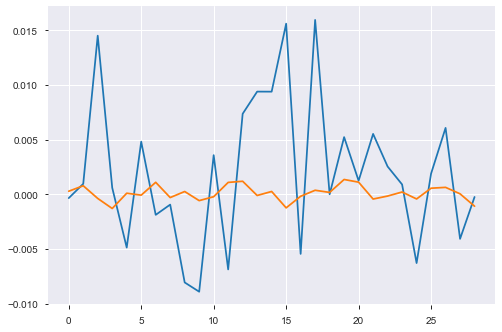

In [77]:
plt.plot(return_y_1[-29:],label = 'test set')
plt.plot(np.array(lstm_y_pred),label = 'prediction set')
plt.show()

Since the long calculation time, I just do 50 loops and check whether the results are better. As the performance matrix shows,
every indicator becomes much better, especially R2. The overfitting problem has been solved, compared with the last graph.

## 5.3 Technical indexes

In [78]:
Train_ti_xy = TrainX_priceIT.loc[:,'ma7':'momentum'].join(TrainY_priceIT).values

Test_ti_xy = LtestX_price_AAPL.loc[:,'ma7':'momentum'].join(Ltesty_price_AAPL).values


In [79]:
Train_ti_x_1,Train_ti_y_1 = split_sequences(Train_ti_xy, 1)
Test_ti_x_1,Test_ti_y_1 = split_sequences(Test_ti_xy, 1)

In [80]:
testPredict,y_test = LSTM_model(Train_ti_x_1,Train_ti_y_1,Train_ti_xy,
               Test_ti_x_1,Test_ti_xy,
               step_size)


test_evs: 3.211021448734641e-10
test_r2: -0.011422882577624138
test_max_error: 0.06231285293993145


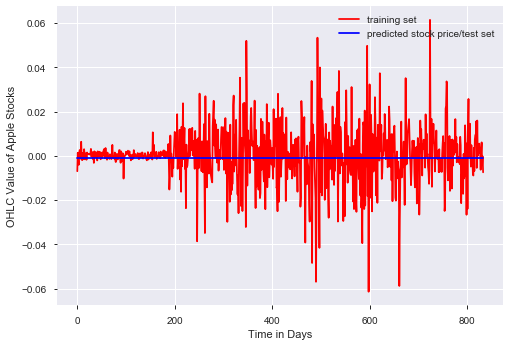

In [81]:
# PLOT OF MAIN OHLC VALUES, TRAIN PREDICTIONS AND TEST PREDICTIONS
#plt.plot(OHLC_avg, 'g', label = 'original dataset')
plt.plot(y_test, 'r', label = 'training set')
plt.plot(testPredict, 'b', label = 'predicted stock price/test set')
plt.legend(loc = 'upper right')
plt.xlabel('Time in Days')
plt.ylabel('OHLC Value of Apple Stocks')
plt.show()

### 5.3.2 Rolling window method

Considering the memory problem(what I use is 8G Memory ),
My laptop colapses after running the codes as follows. 
LSTM takes up too much memory.
So I just list the codes below.

In [82]:
# AAPL['Lag1_Adj_Close'] = AAPL['Adj_Close'].shift(1)
# TI_XY = AAPL.loc[:,['Lag1_Adj_Close','Adj_Close_return']]
# dataset_TI_df = get_technical_indicators(TI_XY)
# dataset_TI_df.head()
# order = ['Lag1_Adj_Close', 'ma7', 'ma21', '26ema', '12ema',
#        'MACD', '20sd', 'upper_band', 'lower_band', 'ema', 'momentum','Adj_Close_return']
# dataset_TI_df = dataset_TI_df[order]
# dataset_TI_df.dropna().head()
# ti_x_1,ti_y_1 = split_sequences(dataset_TI_df.values, 1)

In [83]:
# import time

# win = 252
# X = ti_x_1[-302:]
# y = ti_y_1[-302:]
# testPredict = []

# for t in range(0,len(X)-win+1):
#     start = time.clock()

#     trainX = X[t:t+win]
#     trainY = y[t:t+win]
#     Test_X = X[t+win+1:t+win+2]
#     testPredict.append(LSTM_rolling(trainX,trainY,Test_X))
    
#     elapsed = (time.clock() - start)
#     print("Time used:",elapsed,' sec')

Model in 5.3.1 has the best performance based on performance matrix. (for 5.3.2 and 5.2.2, as rolling method requires keep training the model, so I don't take those into consideration though they perform better.)


# 6. Reference Article
- https://www.joinquant.com/community/post/detailMobile?postId=15443&page=&limit=20&replyId=&tag=
- https://cloud.tencent.com/developer/article/1031101
- https://www.cnblogs.com/yunerlalala/p/6341050.html
- https://www.kaggle.com/raoulma/ny-stock-price-prediction-rnn-lstm-gru
- https://github.com/NourozR/Stock-Price-Prediction-LSTM

# Brain map

1. Get the data
    - 1.1 get the data
        - load the data
        - calculate the return(adj_return and return) based on the close price

    - 1.2 have a look at the data: 
        - No missing
        - Volatility
        - Coefficient of variation
        - get features of return through volatility and graph	
        - decide what the y_label should be 
    - 1.3 define the performance measure
    - 1.4 create test dataset
        - training and test dataset(0.8:0.2)

2. EDA
 	- First do EDA to the basic variables
	- 2.1 return and volumn
	- 2.2 return and prices
	- 2.3 return and DIV
	- 2.4 return and lag_return
	- 2.5 all variables analyse(correlation)

- Prepare the data
	- 3.1 data cleaning
	- 3.2 ARIMA Test: basic test for time series(self-explanation)
	- 3.3 Feature Engineering
        - 3.3.1 techical indicators & pair difference (AAPL & XLK)
	 - 3.3.2 Get feature importance (all features are almost used properly)
	- 3.4 Scaling

- Classice Machine Learning Model Training
	- 4.1 original data (rolling)
	- 4.2 scaling data (rolling)

- Error Analysis
	- 5.1 LSTM with all features(overfitting)
	- 5.2 LSTM with Lag return
		- 5.2.1 prediction with one model
		- 5.2.2 prediciton with rolling train and test dataset
	- 5.3 Technical Indexes
		- 5.3.1 prediction with one model
		- 5.3.2 prediciton with rolling train and test dataset
    - 5.4 Model selection
       - Model in 5.3.1 has the best performance based on performance matrix

- Reference and Brain Map

- Holdout dataset
    - 7.1 Model training __ save model(no need to run) The reason to train the model again is because previously the model is packaged in a function, so the result is not saved.
    - 7.2 Data process (need to run --> get testX dataset)
    - 7.3 Model prediction (need to run--> get prediciton result)


# 7. Holdout dataset sample

## 7.1 model training (no need to run)
- Without considering the rolling method, which requires to train a new model every day, the best model is as follow.
- The reason to train the model again is because previously the model is packaged in a function, so the result is not saved.

In [84]:
n_features = Train_ti_x_1.shape[2]
# define final_model
final_model = Sequential()
final_model.add(LSTM(32, input_shape=(step_size,n_features), return_sequences = True))
final_model.add(LSTM(16))
final_model.add(Dense(1))
final_model.compile(optimizer='adam', loss='mse')
# fit final_model
final_model.fit(Train_ti_x_1, Train_ti_y_1, epochs=200, verbose=0)

## 7.2 data process (need to run)

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from datetime import datetime
from sklearn.linear_model import LogisticRegression
import datetime
import pylab
import os.path
import warnings
warnings.filterwarnings("ignore") 

In [90]:
def get_technical_indicators(dataset):
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['Lag1_Adj_Close'].rolling(window=7).mean()
    dataset['ma21'] = dataset['Lag1_Adj_Close'].rolling(window=21).mean()
    
    # Create MACD
    dataset['26ema'] = dataset['Lag1_Adj_Close'].ewm(span=26).mean()
    dataset['12ema'] = dataset['Lag1_Adj_Close'].ewm(span=12).mean()
    dataset['MACD'] = (dataset['12ema']-dataset['26ema'])

    # Create Bollinger Bands
    dataset['20sd'] = dataset['Lag1_Adj_Close'].rolling(20).std()
    dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
    dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)
    
    # Create Exponential moving average
    dataset['ema'] = dataset['Lag1_Adj_Close'].ewm(com=0.5).mean()
    
    # Create Momentum
    dataset['momentum'] = dataset['Lag1_Adj_Close']-1
    
    return dataset

In [91]:
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [92]:
def preocess_data(filename):

    Stock = "./data/stock_012000_122016"
    AAPL = pd.read_csv(os.path.join(Stock,filename))
    AAPL = AAPL.rename(columns = {'Adj Close':'Adj_Close','Dt':'Date'})
    AAPL.index = pd.to_datetime(AAPL.Date)
    AAPL.set_index(["Date"],inplace = True)

    #calculate the return
    AAPL['Close_return'] = (AAPL.Close - AAPL.Close.shift(1))/AAPL.Close.shift(1)  
    AAPL['Adj_Close_return'] = (AAPL.Adj_Close - AAPL.Adj_Close.shift(1))/AAPL.Close.shift(1)  

    AAPL['Lag1_Adj_Close'] = AAPL['Adj_Close'].shift(1)
    TI_XY = AAPL.loc[:,['Lag1_Adj_Close','Adj_Close_return']]
    dataset_TI_df = get_technical_indicators(TI_XY)
    dataset_TI_df.head()
    order = ['Lag1_Adj_Close', 'ma7', 'ma21', '26ema', '12ema',
           'MACD', '20sd', 'upper_band', 'lower_band', 'ema', 'momentum','Adj_Close_return']
    dataset_TI_df = dataset_TI_df[order]
    dataset_TI_df.dropna().head()
    dataset_TI_df = dataset_TI_df.drop(columns = ["Lag1_Adj_Close"])
    test_ti_x_1,test_ti_y_1 = split_sequences(dataset_TI_df.values, 1)
    return test_ti_x_1

test_ti_x_1 = preocess_data("AAPL.csv")

## 7.3 Model prediction (need to run)

In [93]:
import os
from tensorflow.keras.models import load_model

modelName = "final_model"
model_path = os.path.join(".", modelName + ".h5")   

def saveModel(model, model_path):  
    model.save(model_path)  
    
def loadModel(model_path):
    model = load_model(model_path)
    return model

def MyModel(x_test, model_path):
    # YOU MAY NOT change model after this statement !
    model = loadModel(model_path)
    
    # It should run model to create an array of predictions; we initialize it to the empty array for convenience
    predictions = []    
    # YOUR CODE GOES HERE
    model.summary()
    predictions = model.predict(test_ti_x_1)
    print(predictions)
    
    return predictions


# Assign to variable my_model the model that solves task 3.2
my_model = final_model # CHANGE None to your model !

saveModel(my_model, model_path)


In [94]:
predicts = MyModel(test_ti_x_1, model_path)

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_69 (LSTM)               (None, 1, 32)             5504      
_________________________________________________________________
lstm_70 (LSTM)               (None, 16)                3136      
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 17        
Total params: 8,657
Trainable params: 8,657
Non-trainable params: 0
_________________________________________________________________
[[       nan]
 [       nan]
 [       nan]
 ...
 [0.00093949]
 [0.00093947]
 [0.00093953]]


I try using sample data to do prediciton as above. And when do the holdout dataset test, no need to run the following two lines:

 - my_model = final_model 

 - saveModel(my_model, model_path)


In [95]:
print("Done")

Done
